# Supervised Learning - Linear Models #

## Gradient Descent for Multiple Variables ##

The gradient descent equation itself is generally the same form; we just have to repeat it for our 'n' features:

$\begin{align*} & \text{repeat until convergence:} \; \lbrace \newline \; & \theta_0 := \theta_0 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_0^{(i)}\newline \; & \theta_1 := \theta_1 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_1^{(i)} \newline \; & \theta_2 := \theta_2 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_2^{(i)} \newline & \cdots \newline \rbrace \end{align*}$

The following image compares gradient descent with one variable to gradient descent with multiple variables:
![](gradient_multiple_1.png)

## Let's try this out ##

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Lets explore our data
print("Keys of diabetes dataset: \n{}".format(diabetes.keys()))

# Description of the dataset 
print(diabetes['DESCR'][:900] + "\n...")

print(diabetes['feature_names'])



Keys of diabetes dataset: 
dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each 

In [16]:
import pandas as pd
diabetes_X = np.array(diabetes.data)
display(pd.DataFrame(diabetes_X))


# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20] #80%
diabetes_X_test = diabetes_X[-20:] #20%
# print(diabetes_X_train)

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]
# print(diabetes_y_test)

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [17]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [18]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]
Mean squared error: 2004.57
Variance score: 0.59


## Gradient Descent in Practice I - Feature Scaling ##

We can speed up gradient descent by having each of our input values in roughly the same range. This is because θ will descend quickly on small ranges and slowly on large ranges, and so will oscillate inefficiently down to the optimum when the variables are very uneven.

The way to prevent this is to modify the ranges of our input variables so that they are all roughly the same. Ideally:

$$−1 ≤ x_{(i)} ≤ 1$$ or $$−0.5 ≤ x_{(i)}≤ 0.5 $$

These aren't exact requirements; we are only trying to speed things up. The goal is to get all input variables into roughly one of these ranges, give or take a few.

Two techniques to help with this are **feature scaling** and mean **normalization**. Feature scaling involves dividing the input values by the range (i.e. the maximum value minus the minimum value) of the input variable, resulting in a new range of just 1. Mean normalization involves subtracting the average value for an input variable from the values for that input variable resulting in a new average value for the input variable of just zero. To implement both of these techniques, adjust your input values as shown in this formula:

$$x_i := \frac{x_i - μ_i}{s_i} $$

Where $μ_i$ is the average of all the values for feature (i) and $s_i$ is the range of values (max - min), or $s_i$ is the standard deviation.

For example, if $x_i$ represents housing prices with a range of 100 to 2000 and a mean value of 1000, then, $xi:= \dfrac{price-1000}{1900}$ .



# Supervised Learning - Logistic Regression #

Just like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the logistic of this result.

$$
\hat{p} = h_{\boldsymbol{\theta}}(\mathbf{x}) = \sigma(\boldsymbol{\theta}^T \mathbf{x})
$$

The logistic—also called the logit, noted σ(·)—is a sigmoid function (i.e., S-shaped) that outputs a number between 0 and 1.

$$
\sigma(t) = \dfrac{1}{1 + \exp(-t)}
$$

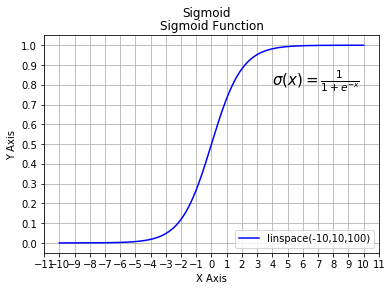

In [19]:
#import section
from matplotlib import pylab
import pylab as plt
import numpy as np

#sigmoid = lambda x: 1 / (1 + np.exp(-x))
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

mySamples = []
mySigmoid = []

# generate an Array with value ???
# linespace generate an array from start and stop value
# with requested number of elements. Example 10 elements or 100 elements.
# 
y = plt.linspace(-10,10,1000)

# prepare the plot, associate the color r(ed) or b(lue) and the label 
plt.plot(y, sigmoid(y), 'b', label='linspace(-10,10,100)')

# Draw the grid line in background.
plt.grid()

# Title & Subtitle
plt.title('Sigmoid Function')
plt.suptitle('Sigmoid')

# place the legen boc in bottom right of the graph
plt.legend(loc='lower right')

# write the Sigmoid formula
plt.text(4, 0.8, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=15)

#resize the X and Y axes
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.1))
 

# plt.plot(x)
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

# create the graph
plt.show()

Once the Logistic Regression model has estimated the probability $p = h_{\theta}(x)$ that an instance $x$ belongs to the positive class, it can make its prediction $\hat{y}$ easily. 



$$
\hat{y} =
\begin{cases}
  0 & \text{if } \hat{p} < 0.5, \\
  1 & \text{if } \hat{p} \geq 0.5.
\end{cases}
$$

Notice that $\sigma(t) < 0.5$ when $t < 0$, and $\sigma(t) ≥ 0.5$ when $t ≥ 0$, so a Logistic Regression
model predicts 1 if $θ^T · x$ is positive, and 0 if it is negative.

The objective of training is to set the parameter vector $\theta$ so that the model estimates high probabilities for positive instances $(y = 1)$ and low probabilities for negative instances $(y = 0)$.

Cost function of single example:

$$
c(\boldsymbol{\theta}) =
\begin{cases}
  -\log(\hat{p}) & \text{if } y = 1, \\
  -\log(1 - \hat{p}) & \text{if } y = 0.
\end{cases}
$$


This cost function makes sense because $– log(t)$ grows very large when t approaches 0, so the cost will be large if the model estimates a probability close to 0 for a positive instance, and it will also be very large if the model estimates a probability close to 1 for a negative instance. On the other hand, – log(t) is close to 0 when t is close to 1, so the cost will be close to 0 if the estimated probability is close to 0 for a negative instance or close to 1 for a positive instance, which is precisely what we want.

The cost function over the whole training set is simply the average cost over all training instances. It can be written in a single expression (as you can verify easily), called the log loss.

$$
J(\boldsymbol{\theta}) = -\dfrac{1}{m} \sum\limits_{i=1}^{m}{\left[ y^{(i)} log\left(\hat{p}^{(i)}\right) + (1 - y^{(i)}) log\left(1 - \hat{p}^{(i)}\right)\right]}
$$


This cost function is convex, so Gradient Descent (or any other optimization algorithm) is guaranteed to find the global minimum (if the learning rate is not too large and you wait long enough). The partial derivatives of the cost
function with regards to the $j$th model parameter $\theta_j$ is given by

$$
\dfrac{\partial}{\partial \theta_j} \text{J}(\boldsymbol{\theta}) = \dfrac{1}{m}\sum\limits_{i=1}^{m}\left(\mathbf{\sigma(\boldsymbol{\theta}}^T \mathbf{x}^{(i)}) - y^{(i)}\right)\, x_j^{(i)}
$$


The Logistic Regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers. This is called Softmax Regression, or Multinomial Logistic Regression.


The idea is quite simple: when given an instance x, the Softmax Regression model first computes a score sk(x) for each class $k$, then estimates the probability of each class by applying the softmax function (also called the normalized exponential) to the scores. The equation to compute $s_k(x)$ should look familiar, as it is just like the equation
for Linear Regression prediction. 

$$
s_k(\mathbf{x}) = ({\boldsymbol{\theta}^{(k)}})^T \mathbf{x}
$$


Note that each class has its own dedicated parameter vector $θ_k$. All these vectors are
typically stored as rows in a parameter matrix $\Theta$.

Once you have computed the score of every class for the instance x, you can estimate the probability $\hat{p}_k$ that the instance belongs to class k by running the scores through the softmax function. it computes the exponential of every score, then normalizes them (dividing by the sum of all the exponentials).

$$
\hat{p}_k = \sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}
$$

- $K$ is the number of classes.
- $s(x)$ is a vector containing the scores of each class for the instance x.
- $σ(s(x))_k$ is the estimated probability that the instance x belongs to class k given
the scores of each class for that instance.

Just like the Logistic Regression classifier, the Softmax Regression classifier predicts the class with the highest estimated probability (which is simply the class with the highest score).

$$
\hat{y} = \underset{k}{\operatorname{argmax}} \, \sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \underset{k}{\operatorname{argmax}} \, s_k(\mathbf{x}) = \underset{k}{\operatorname{argmax}} \, \left( ({\boldsymbol{\theta}^{(k)}})^T \mathbf{x} \right)
$$

- The argmax operator returns the value of a variable that maximizes a function. In this equation, it returns the value of k that maximizes the estimated probability 
